In [1]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
from print_dict import pd as printd
%matplotlib inline
#%matplotlib widget
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

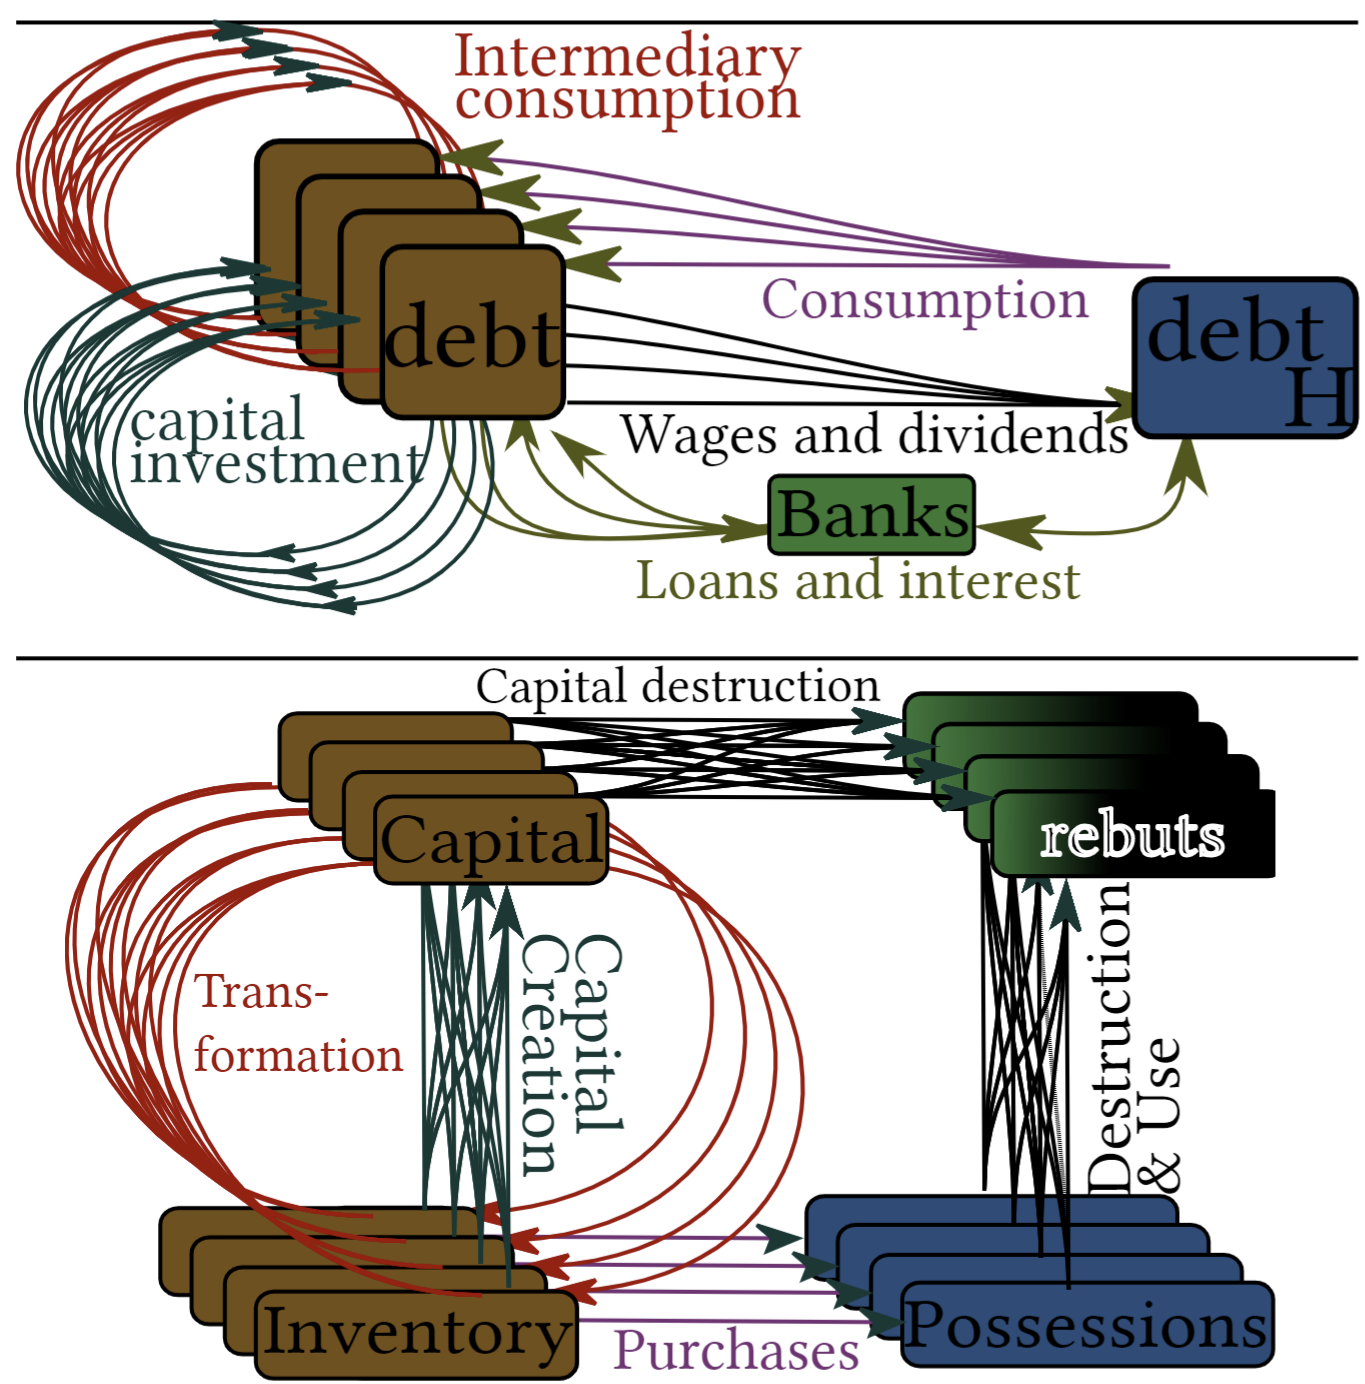

# From "Goodwin" to multisectoral structure 

**WHAT I CALL A GOODWIN SYSTEM IS A TWO-SECTOR PRODUCTION-HOUSEHOLD WITH THE SMALLEST AMOUNT OF BEHAVIOR POSSIBLE (PHILLIPS)**

* full use of capital 
* no inflation 
* Consumption : sum of all incomes
* Investment : profit + degradation 


### CES with omega capping

* CES production function in the limit case $\eta \to \infty$


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'A', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'kY', 'kI', 'kC', 'softmin', 'epsilonV']
Changes Ignored:['chi', 'a', 'w', 'Tmax', 'dt']
Now Nprod has 1 sectors with names ['0']

Changing Dimensions: ['dt', 'Tmax']

time step 696 / 2000
time step 1380 / 2000
time step 2000 / 2000


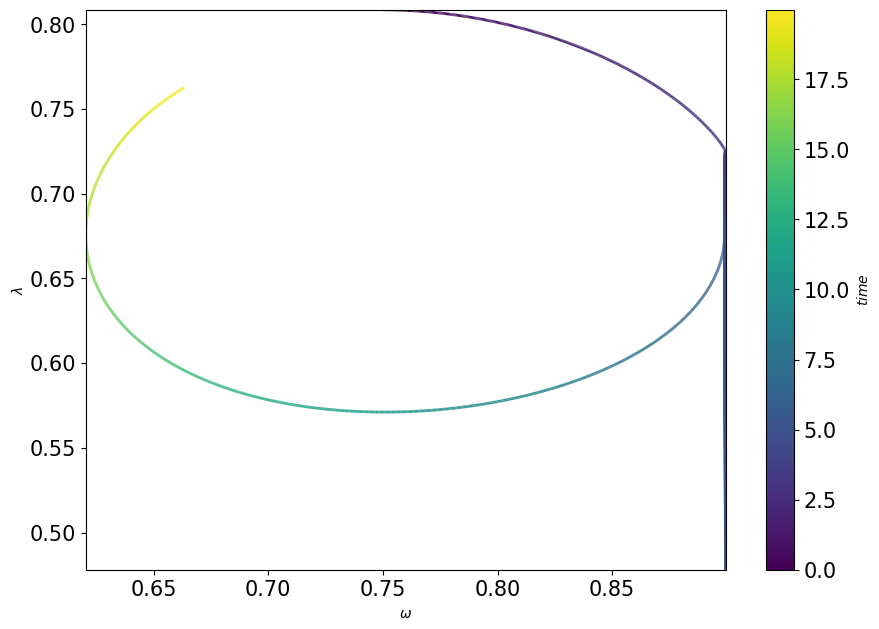

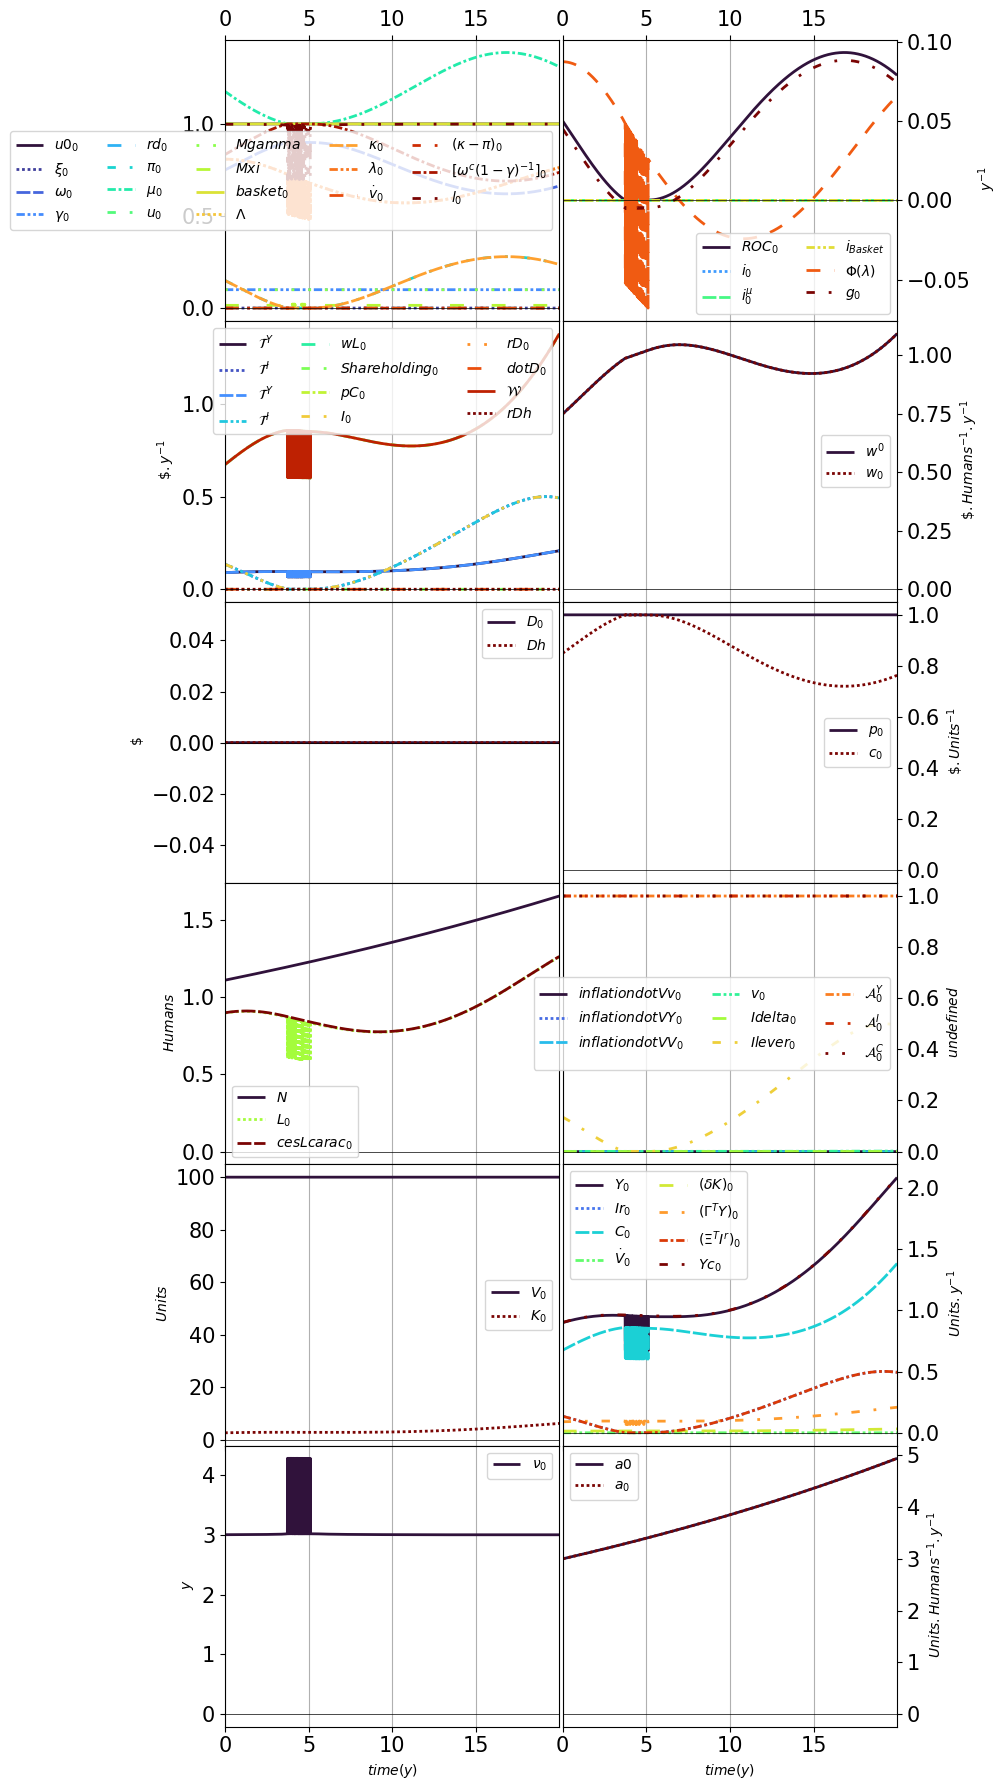

In [4]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](1) 

hub.set_dparam(**dparam0)
hub.set_dparam(**{'dt':0.01,
                  'Tmax':20})
hub.run()
pgm.plots.XY(hub,'omega','employment','time')
hub.plot()

### Dynamic around the equilibrium 

Goodwin starting around the equilibrium


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'A', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'kY', 'kI', 'kC', 'softmin', 'epsilonV']
Changes Ignored:['chi', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 1 sectors with names ['0']

Changing Dimensions: ['dt']
Changing Fields: ['CESexp']
Changes Ignored:['Tmax']
Identified CESexp as a value change on all axes

time step 714 / 10000
time step 1409 / 10000
time step 2084 / 10000
time step 2762 / 10000
time step 3428 / 10000
time step 4112 / 10000
time step 4736 / 10000
time step 5323 / 10000
time step 5974 / 10000
time step 6647 / 10000
time step 7307 / 10000
time step 7963 / 10000
time step 8622 / 10000
time step 9269 / 10000
time step 9922 / 10000
time step 10000 / 10000


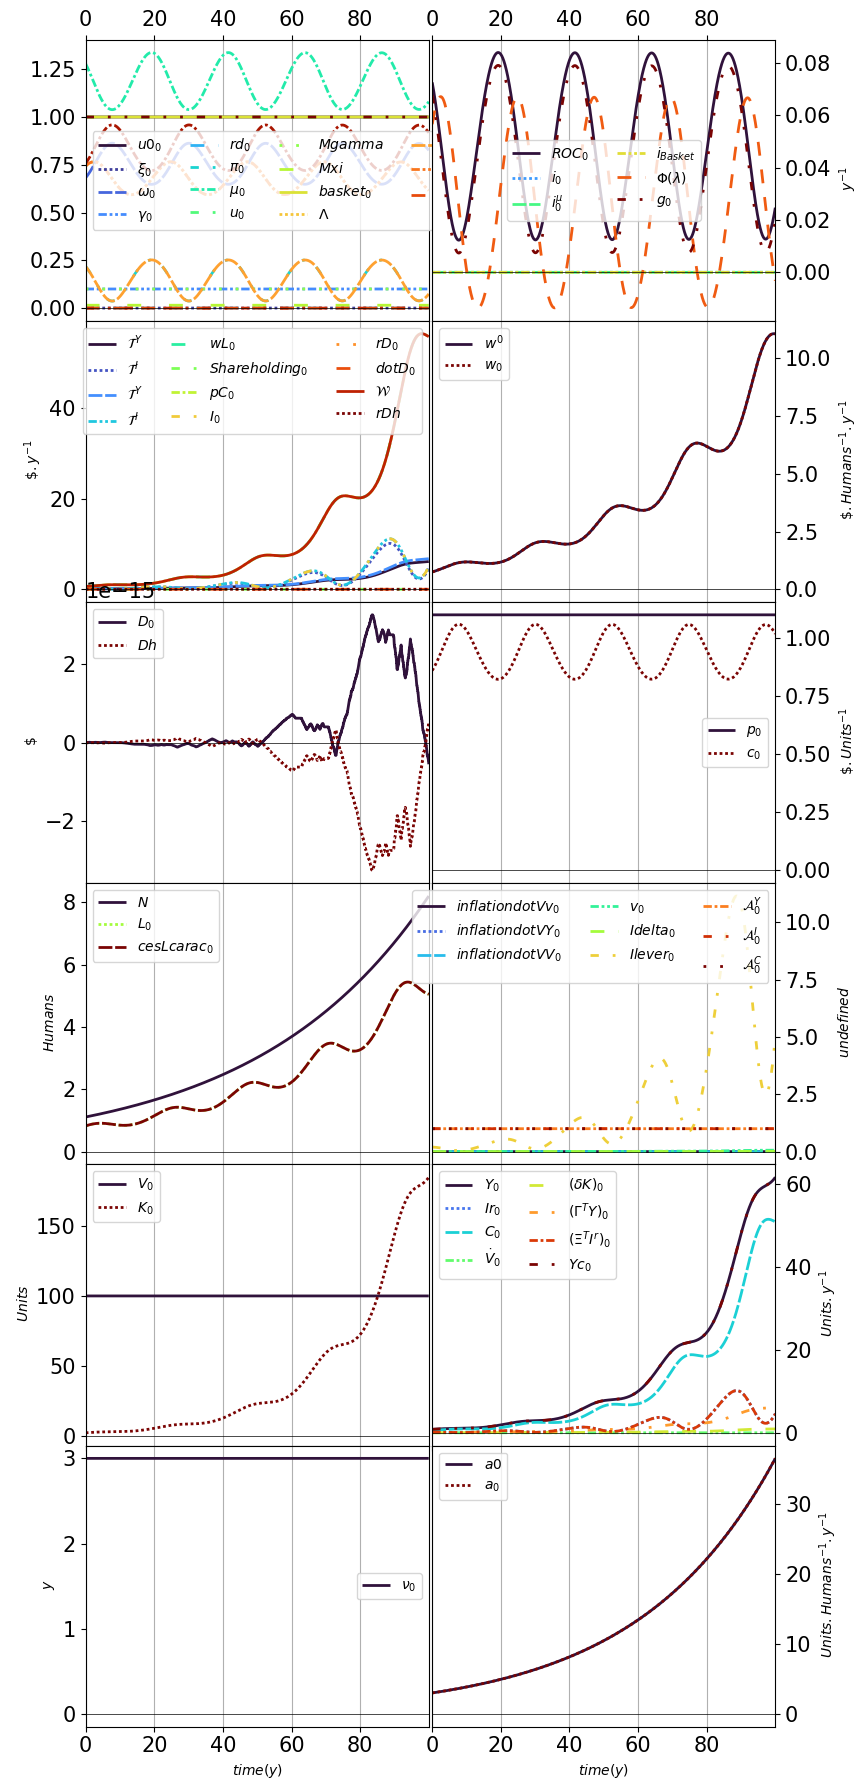

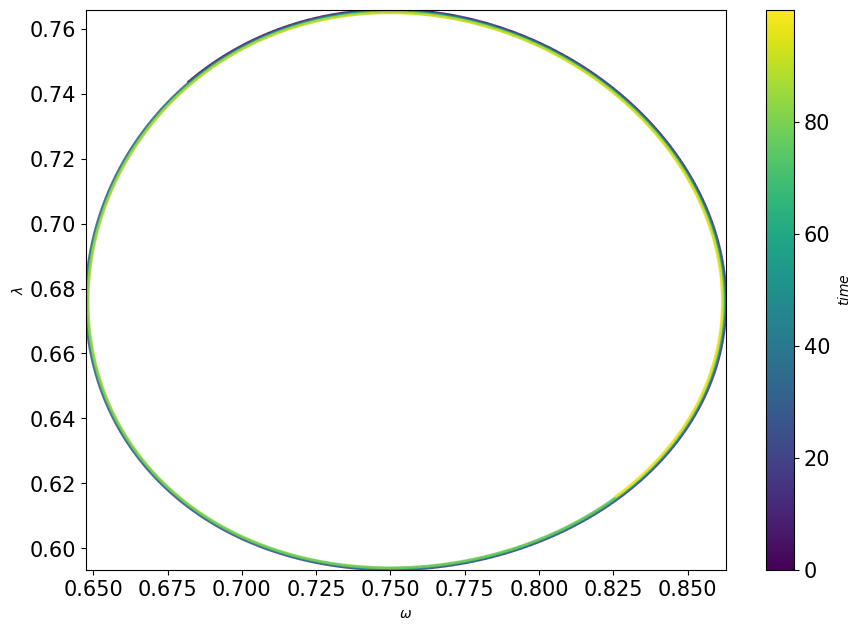

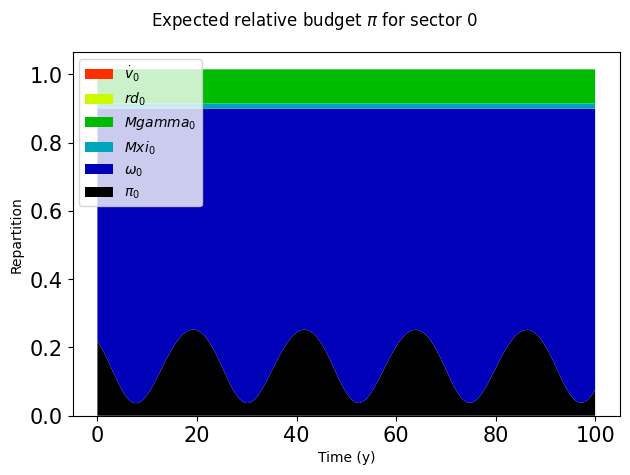

In [12]:
hub=pgm.Hub('CHIMES0',verb=False)

# EQUILIBRIUM
dparam0 = hub.supplements['generateNgoodwin'](1) 
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth
K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N

# OUT OF EQUILIBRIUM
dparam0['K']*=1.1
dparam0['p']*=1.1

# 
hub.set_dparam(**dparam0)
hub.set_dparam(**{'dt':0.01,
                  'Tmax':100,
                  'CESexp':10000})
hub.run()
hub.plot()

pgm.plots.XY(hub,'omega','employment','time')
#pgm.plots.plotnyaxis(hub,[['AcY','AcI','AcC'],
#                      ['V']])

hub.supplements['PiRepartition'](hub)



Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'A', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'kY', 'kI', 'kC', 'softmin', 'epsilonV']
Changes Ignored:['chi', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']
Identified CESexp as a value change on all axes

time step 637 / 1000
time step 1000 / 1000


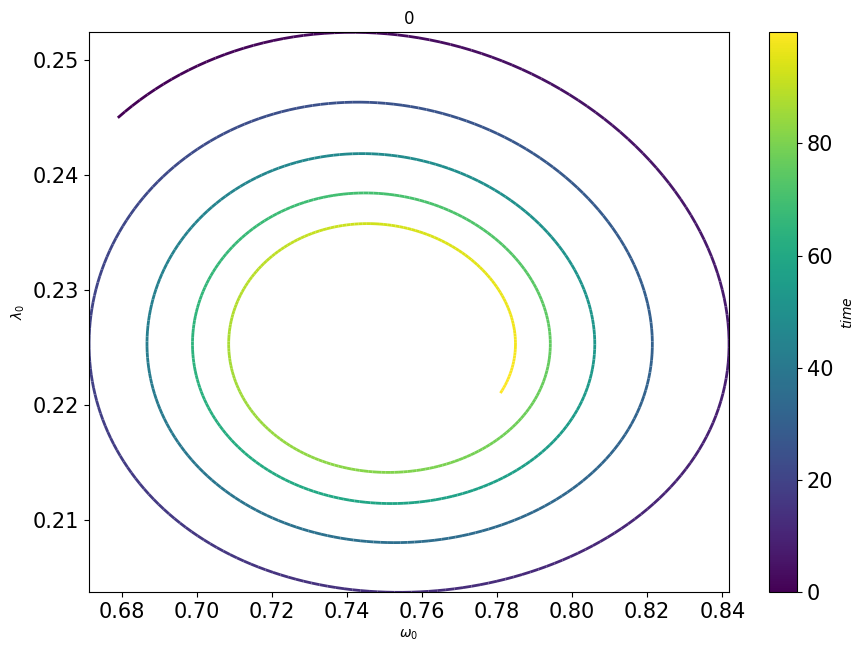

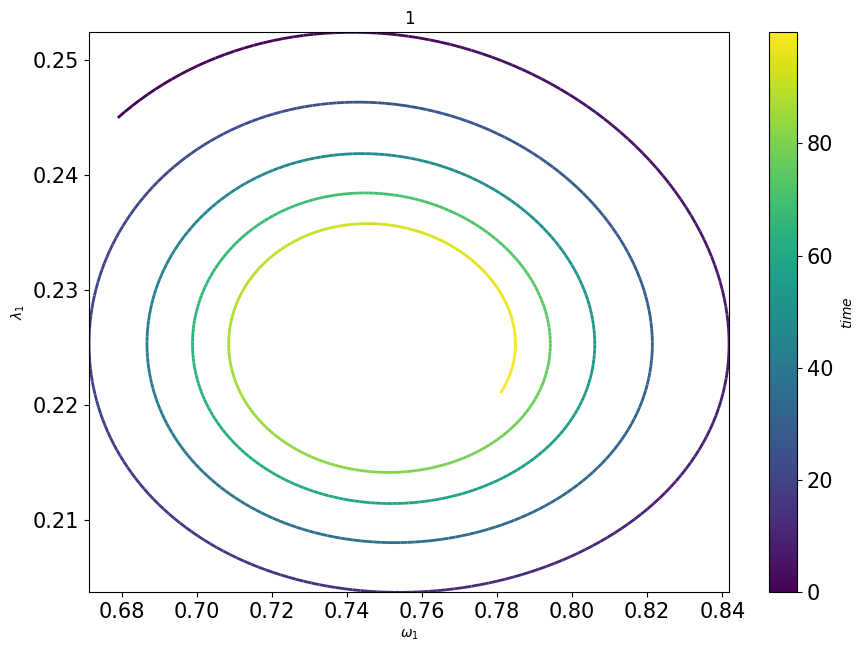

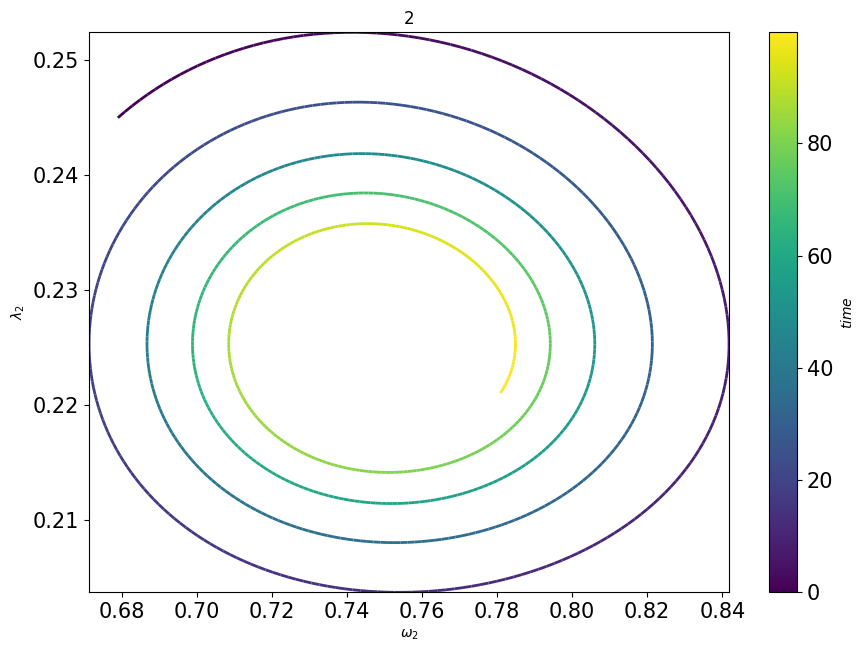

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:204: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



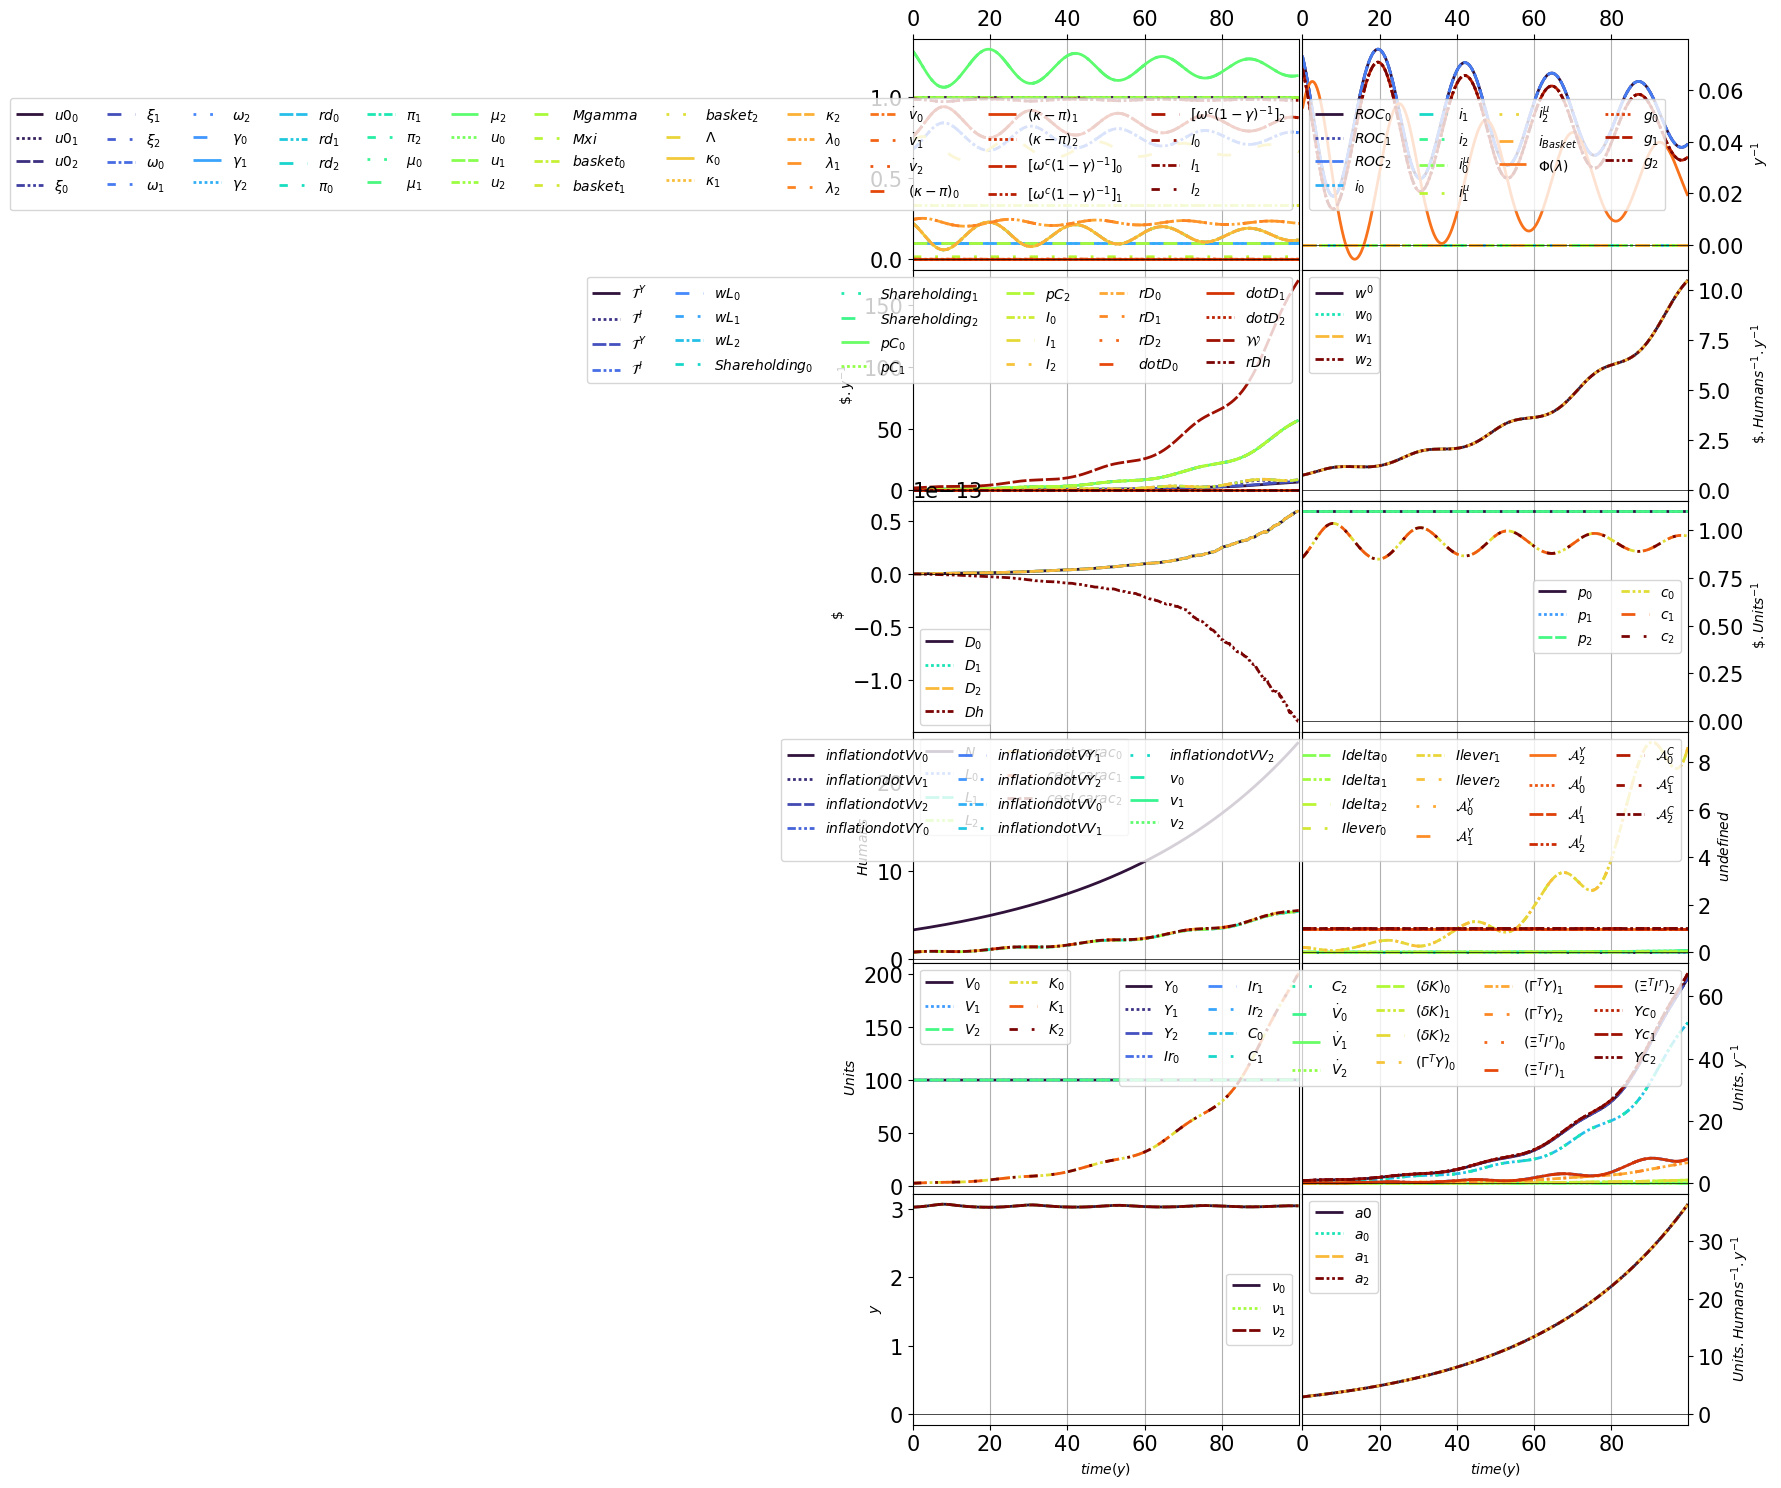

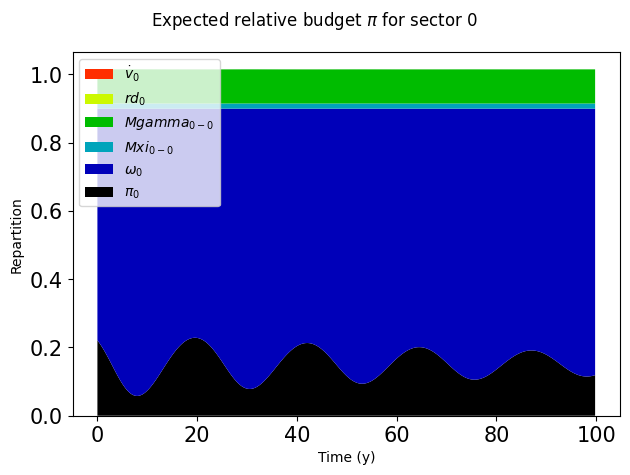

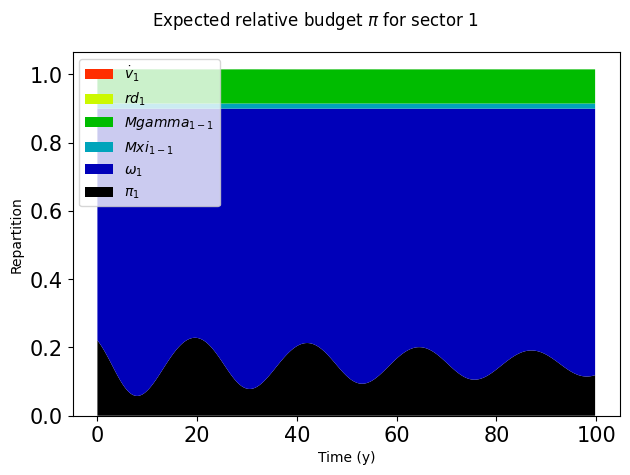

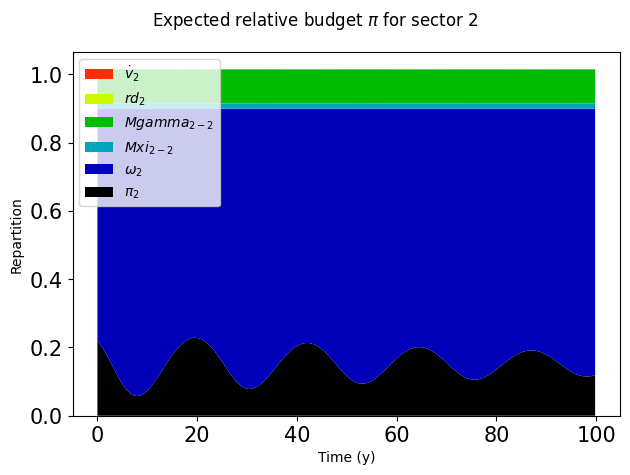

In [16]:
hub=pgm.Hub('CHIMES0',verb=False)

# SCALING TO THE EQUILIBRIUM
dparam0 = hub.supplements['generateNgoodwin'](3) 
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth
K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N

# DESCALE
dparam0['K']*=1.1
dparam0['p']*=1.1
dparam0['CESexp']=100
dparam0['Tmax']=100
hub.set_dparam(**dparam0,verb=True) 

#########################################
hub.run()
pgm.plots.Sankey(hub,t=50)

for sect in dparam0['Nprod']:
    pgm.plots.XY(hub,['omega',sect],['employment',sect],title=sect)
hub.plot()
hub.supplements['PiRepartition'](hub)

### Desynchronized Goodwin 

In [ ]:
## At equilibrium
for _ in range(5):
    hub=pgm.Hub('CHIMES0',verb=False)

    # Generating a basic dictionnary of N sectors 
    dparam0 = hub.supplements['generateNgoodwin'](3) 

    # FORCING THE EQUILIBRIUM 
    dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
    dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth

    K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
    dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
    dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']
    #pprint(dparam0)

    # DESYNCHRONISATION 
    noise = np.random.normal(1,0.2,size=len(dparam0['Nprod']))
    dparam0['K']*= noise

    noise2 = np.random.normal(1,0.1,size=len(dparam0['Nprod']))
    dparam0['p']*= noise2 

    dparam0['Cpond']=noise/(len(dparam0['Nprod']))
    dparam0['Cpond']/=np.sum(dparam0['Cpond'])

    hub.set_dparam(**dparam0,verb=True) 
    hub.set_dparam('Tmax',100,verb=False) 

    hub.run(N=1000)
    '''
    for sector in dparam0['Nprod']:
        pgm.plots.XYZ(hub,['omega',sector],
                        ['employment',sector],
                        ['rd',sector],
                        ['dotV',sector] )


    pgm.plots.XYZ(hub,['omega',dparam0['Nprod'][0]],
                        ['omega',dparam0['Nprod'][1]],
                        ['omega',dparam0['Nprod'][2]],
                        'time' )
    '''

    #pgm.plots.plotnyaxis(hub,[['omegacarac',dparam0['Nprod'][0]]])

    pgm.plots.plotnyaxis(hub,[[['employment',sect] for sect in dparam0['Nprod']]+['employmentAGG'] ,
                            [['omegacarac',sect] for sect in dparam0['Nprod']]   ])
    #hub.supplements['PiRepartition'](hub)



## Random matrices at equilibrium

We determine randomly :
* the content of the intermediate consumption matrix $\Gamma$
* the content of the capital composition matrix $\Xi$
* the structure of the consumption vector $C^{pond}$ (summing to 1)
* the local wage ponderation $w$
* the local productivity per worker $a$


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'A', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'kY', 'kI', 'kC', 'softmin', 'epsilonV']
Changes Ignored:['chi', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']
Identified CESexp as a value change on all axes

time step 642 / 2000
time step 1251 / 2000
time step 1875 / 2000
time step 2000 / 2000


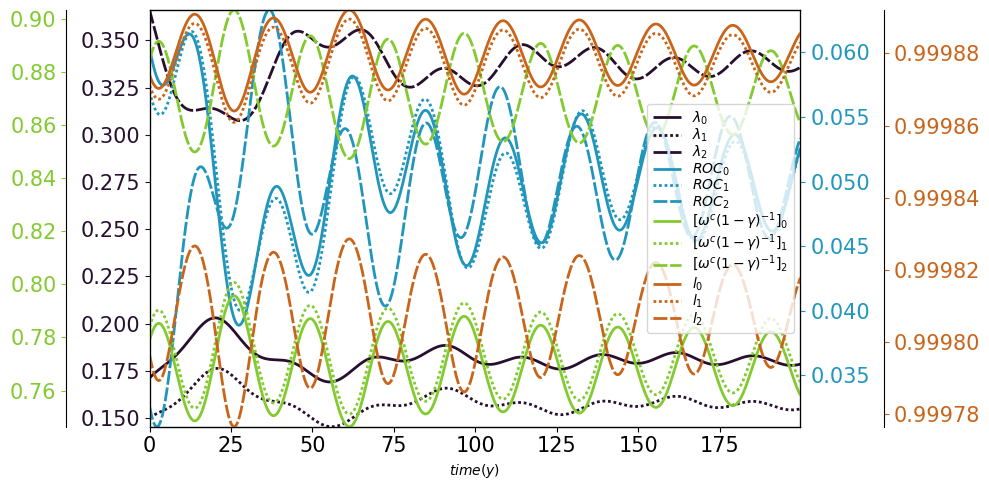

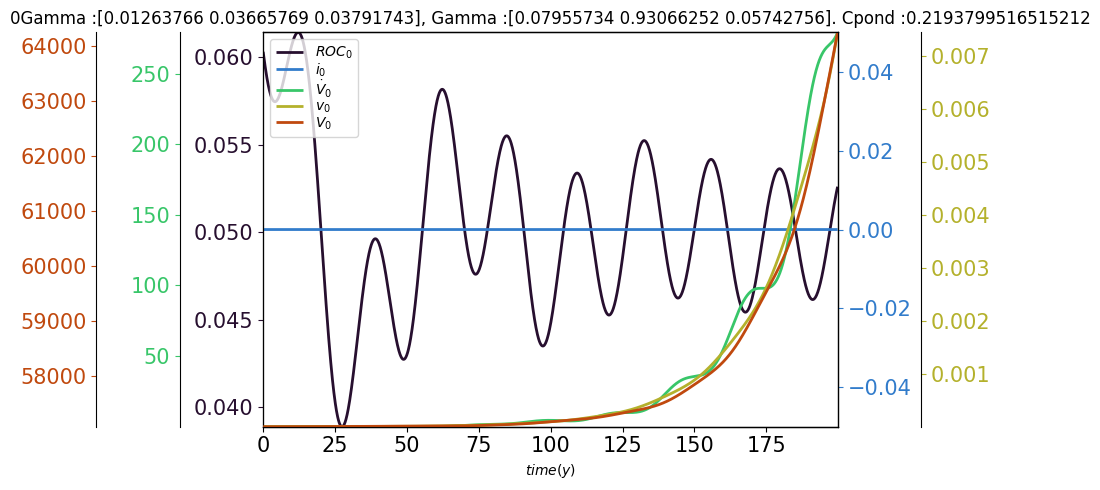

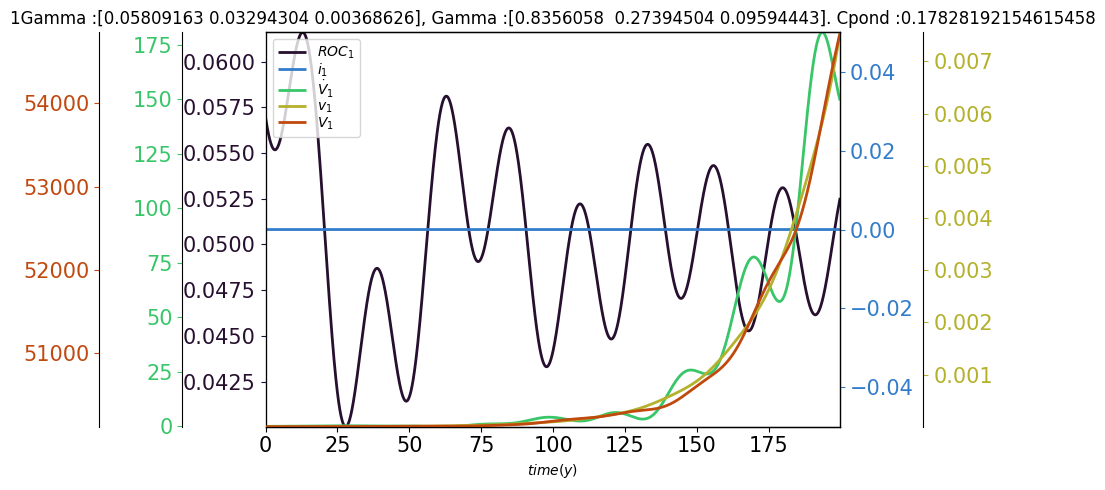

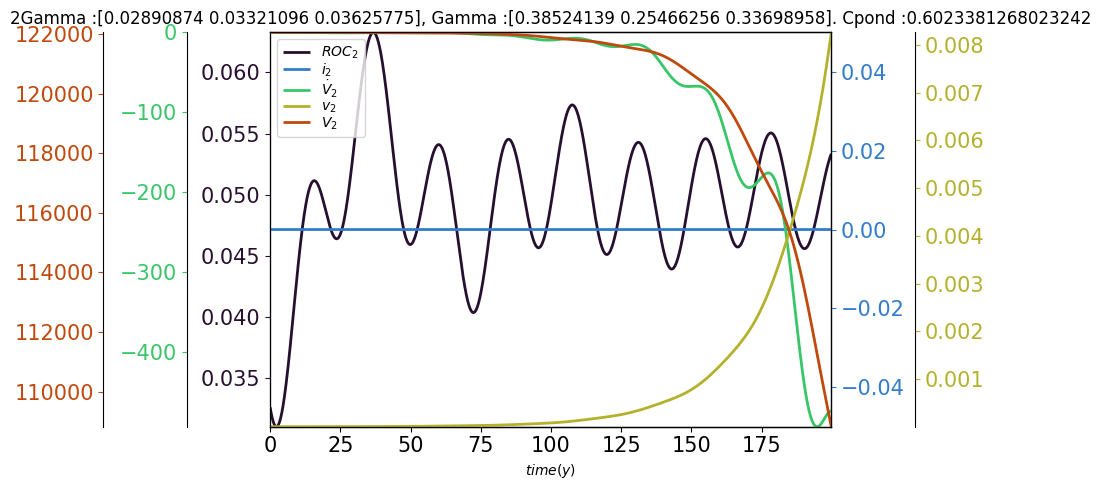

In [19]:

hub=pgm.Hub('CHIMES0',verb=False)

########################################################
Nsect       = 3     # Number of sectors

gamma0      = 0.1   # Mean intermediate consumption
sigmagamma  = .1    # standard deviation on intermediate consumption

xi0         = 1     # Mean capital size 
sigmaxi     = .1    # standard deviation on capital size

apondscale = .05
wpondscale = .05
########################################################

### GENERATION #########################################
dparam0 = hub.supplements['generateNgoodwin'](Nsect) #Basic N Goodwin dictionnary 

# vector equivalent for wage and productivity 
dparam0['apond'] = np.random.normal(1,scale=apondscale,size=Nsect)
dparam0['z']     = np.random.normal(1,scale=wpondscale,size=Nsect)

dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']

### MATRICES AND CONSUMPTION VECTOR (HERE RANDOM) ######
dparam0['Gamma'] = np.random.lognormal(size=(Nsect,Nsect))   
dparam0['Gamma']*= gamma0/np.sum(dparam0['Gamma'],axis=1)[:, np.newaxis]
dparam0['Gamma']*= (1+np.random.normal(scale=sigmagamma,size=Nsect ))[:, np.newaxis]

dparam0['Xi'] = np.random.lognormal(size=(Nsect,Nsect)) 
dparam0['Xi']*= xi0/np.sum(dparam0['Xi'],axis=1)[:, np.newaxis]
dparam0['Xi']*= (1+np.random.normal(scale=sigmaxi,size=Nsect ))[:, np.newaxis]

dparam0['Cpond'] = np.random.lognormal(size=Nsect) 
dparam0['Cpond']/= np.sum(dparam0['Cpond'])

########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
#dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']*1000000

dparam0['CESexp']= 10000
# RUN AND PLOT ######################################## 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',200,verb=False) 

hub.run()

pgm.plots.plotnyaxis(hub,[
                         [employmentAGG],
                          ])
                          

pgm.plots.plotnyaxis(hub,[
                         [['V',sect] for sect in dparam0['Nprod']],
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                         #[['omega',sect] for sect in dparam0['Nprod']],
                         #[['pi',sect] for sect in dparam0['Nprod']],
                         [['omegacarac',sect] for sect in dparam0['Nprod']],
                         [['l',sect] for sect in dparam0['Nprod']],  
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])
"""
pgm.plots.plotnyaxis(hub,[
                         [['AcY',sect] for sect in dparam0['Nprod']],
                         [['AcI',sect] for sect in dparam0['Nprod']],
                         [['AcC',sect] for sect in dparam0['Nprod']], 
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])
"""
for i,sect in enumerate(dparam0['Nprod']):
    title = sect +f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','v','V']],title=title)#,tend=20)

pgm.plots.Sankey(hub,t=60)

## Same with fixed values

In [ ]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= np.array([[0. ,0.1,0],
                            [0. ,0.1,0],
                            [0. ,0.1,0]])
dparam0['Xi']   = np.array([[0. ,0. ,1],
                            [0. ,0. ,1],
                            [0. ,0. ,1]])
dparam0['Cpond'] = np.array([1,0,0])


########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
#dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']*10

dparam0['kY']= 10
dparam0['kI']= 2
dparam0['kC']= 1      

# RUN AND PLOT ######################################## 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])
                          ])

for i,sect in enumerate(dparam0['Nprod']):
    print(i,sect)
    title = sect 
    title+=f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','v','V']],title=title)#,tend=20)

#hub.plot()
hub.supplements['PiRepartition'](hub)
hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
pgm.plots.Sankey(hub,t=50)



## STABILIZING THE SYSTEM 

In [ ]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](6) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption1','Consumption2','Intermediate1','Intermediate2','Investment1','Investment2']
dparam0['Gamma']= np.array([[0. , 0., 0.1, 0 ,0, 0],
                            [0. , 0., 0.1, 0 ,0, 0],
                            [0. , 0.,   0, .1,0, 0],
                            [0. , 0., 0.1, 0 ,0, 0],
                            [0. , 0., 0.1, 0 ,0, 0],
                            [0. , 0., 0, 0, 0, 0],])
dparam0['Xi']   = np.array([[0. , 0., 0, 0 ,1, 0],
                            [0. , 0., 0, 0 ,0, 1],
                            [0. , 0., 0, 0 ,1, 0],
                            [0. , 0., 0, 0 ,1, 0],
                            [0. , 0., 0, 0 ,0, 1],
                            [0. , 0., 0, 0 ,1, 0],])
dparam0['Cpond'] = np.array([0.5,0.5,0,0,0,0])


########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
#dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']*100

dparam0['kY']= 10
dparam0['kI']= 2
dparam0['kC']= 1      

# RUN AND PLOT ######################################## 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])
                          ])

for i,sect in enumerate(dparam0['Nprod']):
    print(i,sect)
    title = sect 
    title+=f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','v','V']],title=title)#,tend=20)

#hub.plot()
#hub.supplements['PiRepartition'](hub)
#hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
pgm.plots.Sankey(hub,t=50)



In [ ]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= np.array([[0. ,0.1,0],
                            [0. ,0.1,0],
                            [0. ,0.1,0]])
dparam0['Xi']   = np.array([[0. ,0. ,1],
                            [0. ,0. ,1],
                            [0. ,0. ,1]])
dparam0['Cpond'] = np.array([1,0,0])

#dparam0['epsilonV']=.5

########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)

dparam0['p']*=1.1
dparam0['employment']*=0.95
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']

########################################################
#              STABILISATION GOES HERE                 # 

#dparam0['u0']=0.9
#dparam0['N']*=.9
#dparam0['sigma']=2

#dparam0['eta']=0.1
#dparam0['mu0']=1.4

#dparam0['chiv']=0.1
#dparam0['chiV']=0.1
#dparam0['chiY']=0

dparam0['kY']=100
dparam0['kI']=10
dparam0['kC']=1
#
########################################################
# RUN AND PLOT 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',200,verb=False) 
#hub.set_dparam('dt',0.01)

hub.run()
'''
#%matplotlib inline
pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                         [['u',sect] for sect in dparam0['Nprod']],  
                          ])
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])

for i,sect in enumerate(dparam0['Nprod']):
    title = sect +f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','V']],title=title)#,tend=20)
'''
#for sect in dparam0['Nprod']:
#    pgm.plots.XY(hub,['inflation',sect],['v',sect])

#hub.plot()
#hub.supplements['PiRepartition'](hub)
hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
#pgm.plots.Sankey(hub)

#print([['employment',i] for i in hub.dparam['Nprod']['list']])
# Looking at employment variation
#pgm.plots.plotnyaxis(hub,y=[[['employment',i] for i in hub.dparam['Nprod']['list']]+['employmentAGG']])
pgm.plots.plotnyaxis(hub,y=[[['dotV',i] for i in hub.dparam['Nprod']['list']],
                            [['inflation',i] for i in hub.dparam['Nprod']['list']],
                            [['u0',i] for i in hub.dparam['Nprod']['list']]])


In [ ]:
pgm.plots.plotnyaxis(hub,[[['AcY',sector] for sector in dparam0['Nprod']],
                          [['AcI','Investment'] for sector in dparam0['Nprod']],
                          [['AcC','Consumption'] for sector in dparam0['Nprod']]])

In [ ]:

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                         [['u',sect] for sect in dparam0['Nprod']],  
                          ])